# Linear Regression example

In [5]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from collections import Counter

ModuleNotFoundError: No module named 'numpy'

In [ ]:
states = pd.read_csv('states.csv')

In [ ]:
states.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


# We try to find dependency between % of poverty and % of citizens which graduated from university

In [ ]:
filtered_states = states.loc[0:, ['hs_grad', 'poverty']]

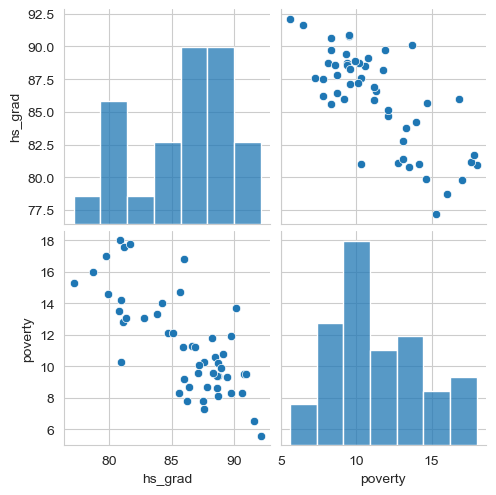

In [ ]:
sb.pairplot(filtered_states)

In [ ]:
print(filtered_states.corr())
mean_grad, mean_poverty = filtered_states.mean()
print("mean_grad: " + str(mean_grad))
print("mean_poverty: " + str(mean_poverty))

          hs_grad   poverty
hs_grad  1.000000 -0.746858
poverty -0.746858  1.000000
mean_grad: 86.01176470588234
mean_poverty: 11.349019607843138


# Here, I find correlation manually:
# cor = cov / (sigmaX * sigmaY)

In [ ]:
cor = 0
numerator = 0
SS_grad = 0
SS_poverty = 0
sigmaGrad = 0
sigmaPoverty = 0
n = filtered_states.shape[0]

for grad, pov in zip(filtered_states["hs_grad"], filtered_states["poverty"]):
    # print("grad: " + str(grad) + " poverty: " + str(pov))
    numerator += (grad - mean_grad) * (pov - mean_poverty)
    SS_grad += (grad - mean_grad) ** 2
    SS_poverty += (pov - mean_poverty) ** 2

sigmaGrad = np.sqrt(SS_grad / n)
sigmaPoverty = np.sqrt(SS_poverty / n)
SS_grad = np.sqrt(SS_grad)
SS_poverty = np.sqrt(SS_poverty)

cor = numerator / (SS_grad * SS_poverty)
print("cor: " + str(cor))


cor: -0.7468582531582505


# This correlation is the same as I found by pandas
# Then I calculate b0, b1 

In [ ]:
b1 = (sigmaPoverty / sigmaGrad) * cor
b0 = mean_poverty - b1 * mean_grad
print("b0: " + str(b0))
print("b1: " + str(b1))

b0: 64.78096577010209
b1: -0.6212167177940106


In [ ]:
# y = b0 + b1 * x
xRegressionLine = []
yRegressionLine = []
xMaxGrad = filtered_states["hs_grad"].max()
xMinGrad = filtered_states["hs_grad"].min()
yMin = b0 + b1 * xMinGrad
yMax = b0 + b1 * xMaxGrad
xRegressionLine.append(xMinGrad)
xRegressionLine.append(xMaxGrad)
yRegressionLine.append(yMin)
yRegressionLine.append(yMax)


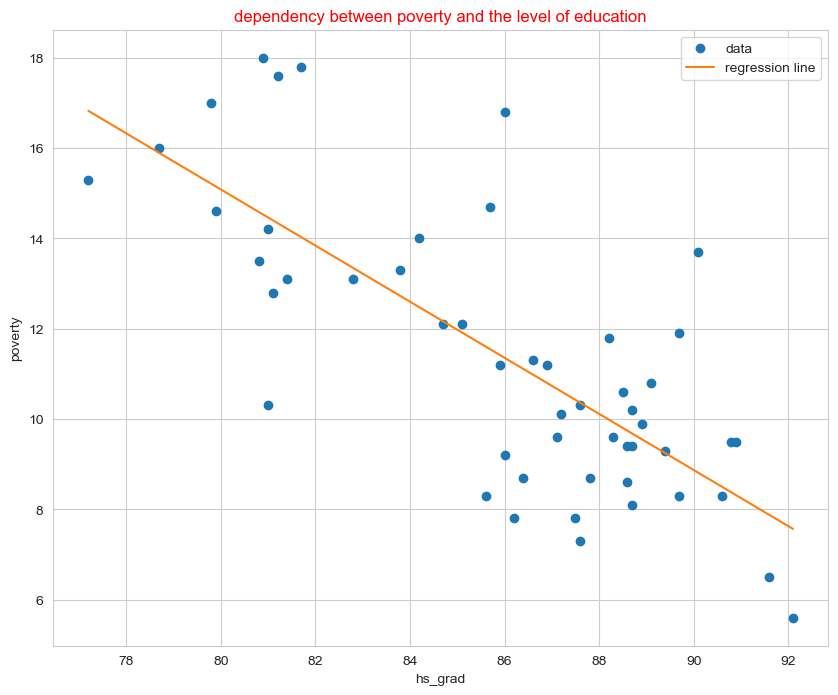

In [ ]:
plt.scatter(filtered_states["hs_grad"], filtered_states["poverty"])
plt.plot(xRegressionLine, yRegressionLine, 'C1', label='C1')
plt.title("dependency between poverty and the level of education", color="red")
plt.xlabel("hs_grad")
plt.ylabel("poverty")
plt.legend(["data", "regression line"])
plt.show()

# The next step will be researching other dependencies and adding to our model

In [ ]:
import statsmodels.api as sm

In [ ]:
X = states.loc[0:, ['hs_grad', 'metro_res', 'white', 'female_house']]
Y = states.loc[:, 'poverty']
# state	metro_res	white	hs_grad	poverty	female_house

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           8.88e-10
Time:                        15:19:50   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           66.4765     12.590      5.280   

C:\Users\mrbab\AppData\Local\Temp\ipykernel_26452\3766273662.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(states.corr())


              metro_res     white   hs_grad   poverty  female_house
metro_res      1.000000 -0.342442  0.018110 -0.204235      0.300062
white         -0.342442  1.000000  0.238156 -0.308520     -0.751394
hs_grad        0.018110  0.238156  1.000000 -0.746858     -0.611867
poverty       -0.204235 -0.308520 -0.746858  1.000000      0.525397
female_house   0.300062 -0.751394 -0.611867  0.525397      1.000000


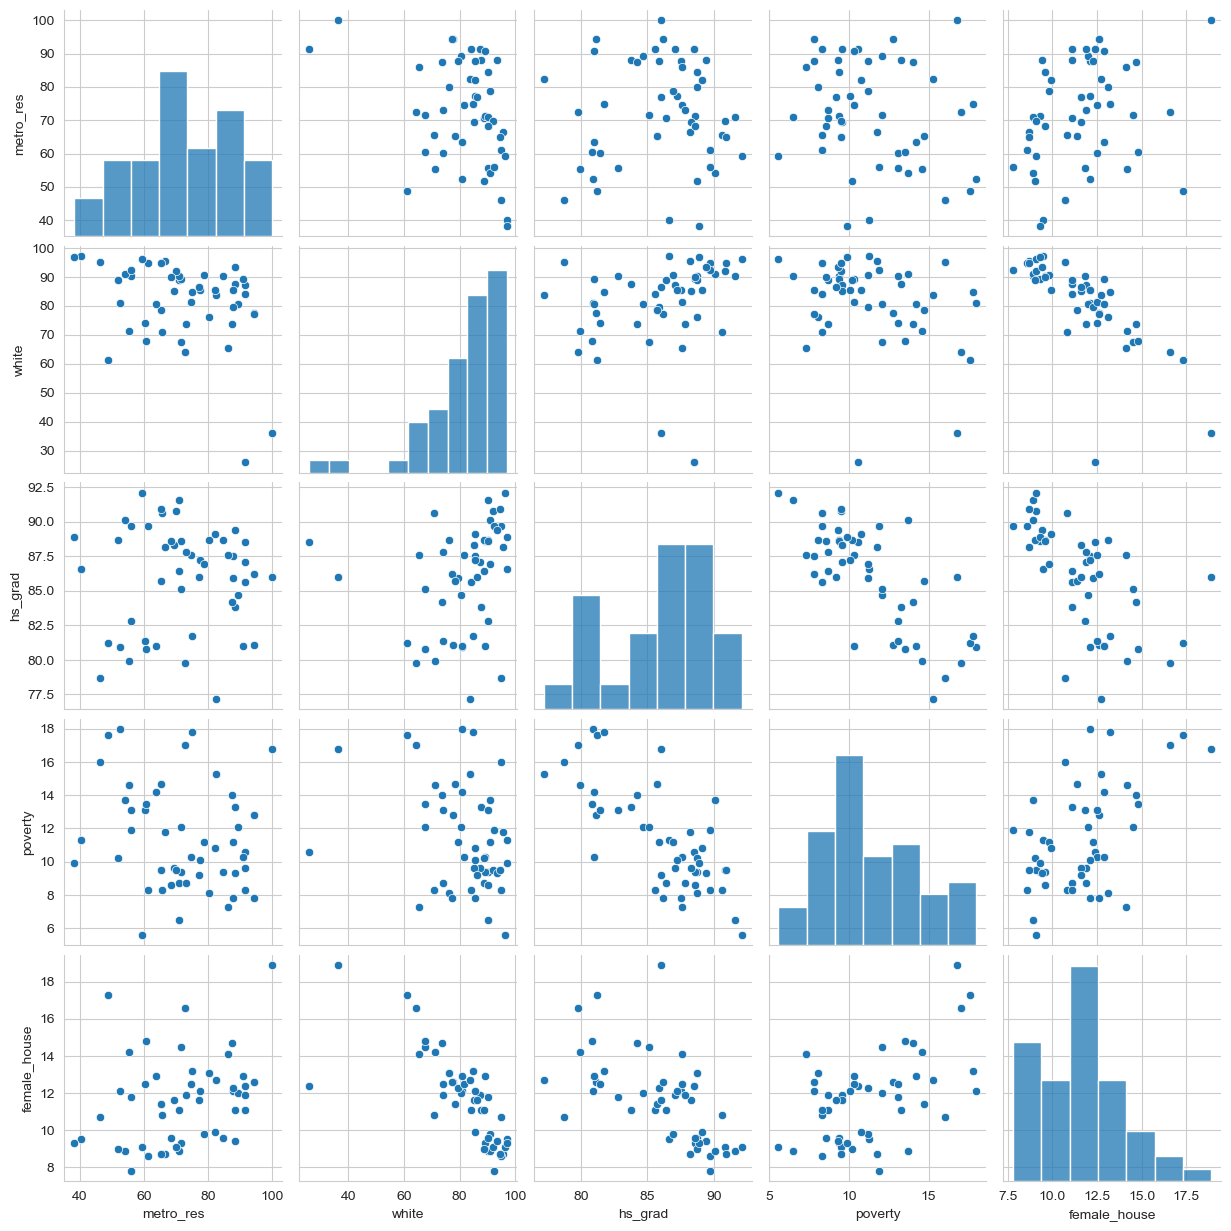

In [ ]:
sb.pairplot(states)
print(states.corr())

# here we can see that corr between % of housewifes and other properties is too strong. It'll be better if we romove it from our model 

In [ ]:
X = states.loc[0:, ['hs_grad', 'metro_res', 'white']]
Y = states.loc[:, 'poverty']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 09 Apr 2023   Prob (F-statistic):           1.55e-10
Time:                        15:38:20   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.7220      6.389     10.756      0.0

# By comparing 2 results, we can see that p-value of the wihte population had decreased, i.e. it has become significantly interconnected and R-squared was increased.

As a result we can say that the linaer regression equation is as follows: 

y = 68.72 + (-0.57) * b1 + (-0.056) * b2 + (-0,054) * b3  
where b1 = hs_grad, b2 = metro_res, b3 = white